# Analysis - exp19 and 20

Repeats of stumbler (19) and stumbler-strategist (20) exps, with top 20 parameters.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import join_monitored

# Find the files
## Exp 19

In [2]:
path = "/Users/type/Code/azad/data/wythoff/exp19/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))
files[:10]

exp_19 = []
for fi in files:
    mon = load_monitored(fi)
    exp_19.append(mon)

## Exp 14

In [3]:
path = "/Users/type/Code/azad/data/wythoff/exp20/"

exp_20 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_2_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_20.append(mon)

IndexError: list index out of range

In [9]:
pprint(exp_19[0].keys())
pprint(exp_20[0].keys())

dict_keys(['file', 'episode', 'loss', 'score', 'total_reward'])


IndexError: list index out of range

In [15]:
print(np.max([np.max(mon['score'][-100:-1]) for mon in exp_19]))
print(np.max([np.max(mon['score'])[-100:-1] for mon in exp_20]))

0.8698498211904493


ValueError: zero-size array to reduction operation maximum which has no identity

# Plots

## Optimal play

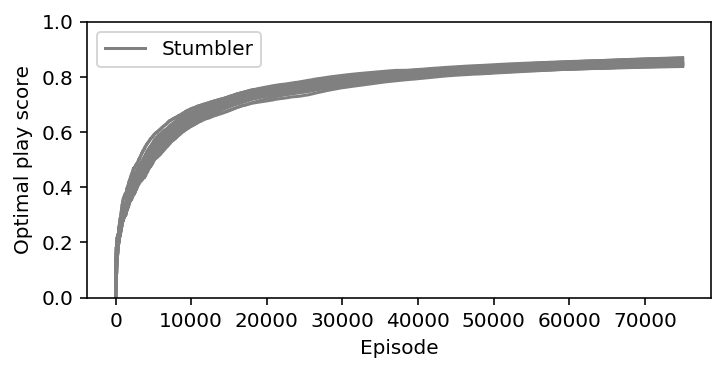

In [8]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_19):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='grey', alpha=1,  label=lab)

for n, mon in enumerate(exp_20):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(mon['episode'], mon['score'], 
                    color='red', alpha=1, label=lab)

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.ylim(0, 1)
_ = plt.xlabel("Episode")
_ = plt.ylabel("Optimal play score")

## Total reward

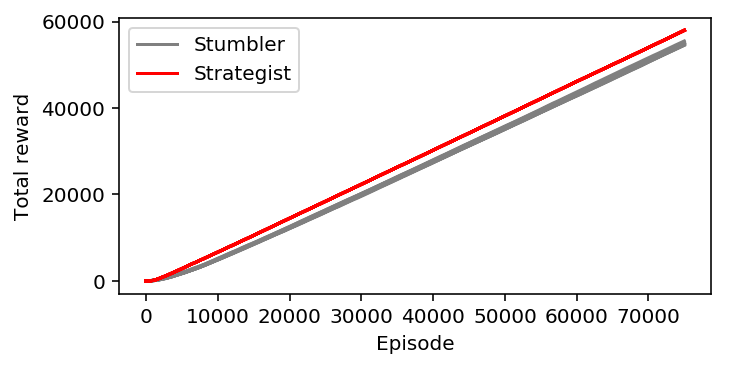

In [78]:
plt.figure(figsize=(5, 2.5))

for n, mon in enumerate(exp_13):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Stumbler"
        
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='grey', alpha=1,  label=lab
    )

for n, mon in enumerate(exp_14):
    # Only want one legend entry
    lab = None
    if n == 0:
        lab = "Strategist"
    
    # Plot
    _ = plt.plot(
            mon['episode'], 
            np.asarray(mon['total_reward']),
            color='red', alpha=1, label=lab
    )

_ = plt.tight_layout()
_ = plt.legend()
_ = plt.xlabel("Episode")
_ = plt.ylabel("Total reward")